<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents-1">Table of Contents</a></span></li><li><span><a href="#Data-Wrangling-with-Pandas" data-toc-modified-id="Data-Wrangling-with-Pandas-2">Data Wrangling with Pandas</a></span><ul class="toc-item"><li><span><a href="#Date/Time-data-handling" data-toc-modified-id="Date/Time-data-handling-2.1">Date/Time data handling</a></span></li><li><span><a href="#Merging-and-joining-DataFrame-objects" data-toc-modified-id="Merging-and-joining-DataFrame-objects-2.2">Merging and joining DataFrame objects</a></span><ul class="toc-item"><li><span><a href="#Exercise-6" data-toc-modified-id="Exercise-6-2.2.1">Exercise 6</a></span></li></ul></li><li><span><a href="#Concatenation" data-toc-modified-id="Concatenation-2.3">Concatenation</a></span></li><li><span><a href="#Reshaping-DataFrame-objects" data-toc-modified-id="Reshaping-DataFrame-objects-2.4">Reshaping DataFrame objects</a></span></li><li><span><a href="#Pivoting" data-toc-modified-id="Pivoting-2.5">Pivoting</a></span></li><li><span><a href="#Data-transformation" data-toc-modified-id="Data-transformation-2.6">Data transformation</a></span><ul class="toc-item"><li><span><a href="#Dealing-with-duplicates" data-toc-modified-id="Dealing-with-duplicates-2.6.1">Dealing with duplicates</a></span></li><li><span><a href="#Value-replacement" data-toc-modified-id="Value-replacement-2.6.2">Value replacement</a></span></li><li><span><a href="#Inidcator-variables" data-toc-modified-id="Inidcator-variables-2.6.3">Inidcator variables</a></span></li></ul></li><li><span><a href="#Categorical-Data" data-toc-modified-id="Categorical-Data-2.7">Categorical Data</a></span><ul class="toc-item"><li><span><a href="#Discretization" data-toc-modified-id="Discretization-2.7.1">Discretization</a></span></li><li><span><a href="#Permutation-and-sampling" data-toc-modified-id="Permutation-and-sampling-2.7.2">Permutation and sampling</a></span></li></ul></li><li><span><a href="#Data-aggregation-and-GroupBy-operations" data-toc-modified-id="Data-aggregation-and-GroupBy-operations-2.8">Data aggregation and GroupBy operations</a></span><ul class="toc-item"><li><span><a href="#Apply" data-toc-modified-id="Apply-2.8.1">Apply</a></span></li><li><span><a href="#Exercise-7" data-toc-modified-id="Exercise-7-2.8.2">Exercise 7</a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-2.9">References</a></span></li></ul></li></ul></div>

# Data Wrangling with Pandas

Now that we have been exposed to the basic functionality of Pandas, let's explore some more advanced features that will be useful when addressing more complex data management tasks.

As most statisticians/data analysts will admit, often the lion's share of the time spent implementing an analysis is devoted to preparing the data itself, rather than to coding or running a particular model that uses the data. This is where Pandas and  Python's standard library are beneficial, providing high-level, flexible, and efficient tools for manipulating your data as needed.


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')

ModuleNotFoundError: No module named 'seaborn'

## Date/Time data handling

Date and time data are inherently problematic. There are an unequal number of days in every month, an unequal number of days in a year (due to leap years), and time zones that vary over space. Yet information about time is essential in many analyses, particularly in the case of time series analysis.

The `datetime` built-in library handles temporal information down to the nanosecond.

In [6]:
from datetime import datetime, date, time

In [7]:
now = datetime.now()
now

datetime.datetime(2020, 4, 8, 13, 14, 29, 709073)

In [8]:
date(1970, 9, 3)

datetime.date(1970, 9, 3)

Having a custom data type for dates and times is convenient because we can perform operations on them easily. For example, we may want to calculate the difference between two times:

In [9]:
my_age = now - datetime(1996, 11, 8)
my_age.days/365

23.43013698630137

<span style="color:red; font-size: 40px"> CHANGE OR NO ALL OF THIS?</span>

In this section, we will manipulate data collected from ocean-going vessels on the eastern seaboard. Vessel operations are monitored using the Automatic Identification System (AIS), a safety at sea navigation technology which vessels are required to maintain and that uses transponders to transmit very high frequency (VHF) radio signals containing static information including ship name, call sign, and country of origin, as well as dynamic information unique to a particular voyage such as vessel location, heading, and speed. 

The International Maritime Organization’s (IMO) International Convention for the Safety of Life at Sea requires functioning AIS capabilities on all vessels 300 gross tons or greater and the US Coast Guard requires AIS on nearly all vessels sailing in U.S. waters. The Coast Guard has established a national network of AIS receivers that provides coverage of nearly all U.S. waters. AIS signals are transmitted several times each minute and the network is capable of handling thousands of reports per minute and updates as often as every two seconds. Therefore, a typical voyage in our study might include the transmission of hundreds or thousands of AIS encoded signals. This provides a rich source of spatial data that includes both spatial and temporal information.

For our purposes, we will use summarized data that describes the transit of a given vessel through a particular administrative area. The data includes the start and end time of the transit segment, as well as information about the speed of the vessel, how far it travelled, etc.

In [10]:
dd = pd.read_csv("Data/dataset_deltatime.csv")
dd.head(10)

,mmsi,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,1,1,1,5.1,13.2,9.2,14.5,96.5,2/10/09 16:03,2/10/09 16:27
1,1,1,1,13.5,18.6,10.4,20.6,100.0,4/6/09 14:31,4/6/09 15:20
2,1,1,1,4.3,16.2,10.3,20.5,100.0,4/6/09 14:36,4/6/09 14:55
3,1,2,1,9.2,15.4,14.5,16.1,100.0,4/10/09 17:58,4/10/09 18:34
4,1,2,1,9.2,15.4,14.6,16.2,100.0,4/10/09 17:59,4/10/09 18:35
5,1,1,1,17.4,34.3,33.9,35.0,100.0,3/20/10 16:06,3/20/10 16:36
6,1,1,2,76.0,34.4,33.8,34.9,100.0,3/20/10 18:05,3/20/10 18:48
7,1,1,1,13.7,6.9,3.0,14.0,38.2,5/4/11 11:28,5/4/11 13:30
8,9,4,1,11.6,8.8,7.9,10.3,0.0,6/5/10 11:23,6/5/10 12:44
9,9,8,1,11.6,8.3,7.4,9.2,0.0,6/8/10 11:03,6/8/10 12:29


For example, we might be interested in the distribution of transit lengths, so we can plot them as a histogram:

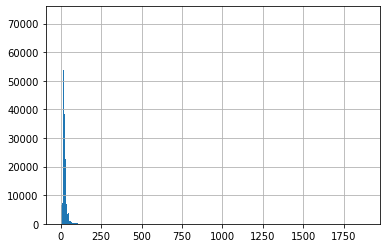

In [11]:
dd.seg_length.hist(bins=500)

Though most of the transits appear to be short, there are a few longer distances that make the plot difficult to read. This is where a transformation is useful:

We can see that although there are date/time fields in the dataset, they are not in any specialized format, such as `datetime`.

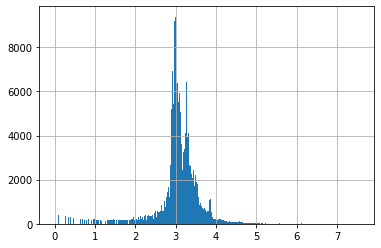

In [12]:
dd.seg_length.apply(np.log).hist(bins=500)

In [13]:
ms = pd.read_csv("Data/mechanical_setup.csv")
ms.head()

,Timestamp,Series_No,Product_No,Turning_Cut_Depth,Milling_Gear_Depth,Drilling_Surf_Quality,Drill_Pressure
0,Timestamp: 01/01/15 01:01:01,XK00001402,5859,0.615159,0.302045,0.652705,3.532358
1,Timestamp: 01/01/15 01:03:55,XK00001402,6212,0.645414,0.320177,0.207444,4.014133
2,Timestamp: 01/01/15 01:04:57,XK00001402,7079,0.637861,0.302711,0.909993,4.377263
3,Timestamp: 01/01/15 01:05:58,XK00001402,61,0.635685,0.301639,0.010166,4.190312
4,Timestamp: 01/01/15 01:06:15,XK00001402,229,0.599048,0.296018,0.007966,4.896710


Our first order of business will be to convert these data to `datetime`. The `strptime` method parses a string representation of a date and/or time field, according to the expected format of this information.

In [14]:
ms["Timestamp"] = ms.Timestamp.apply(lambda d: d[11:])

In [15]:
ms.head()

,Timestamp,Series_No,Product_No,Turning_Cut_Depth,Milling_Gear_Depth,Drilling_Surf_Quality,Drill_Pressure
0,01/01/15 01:01:01,XK00001402,5859,0.615159,0.302045,0.652705,3.532358
1,01/01/15 01:03:55,XK00001402,6212,0.645414,0.320177,0.207444,4.014133
2,01/01/15 01:04:57,XK00001402,7079,0.637861,0.302711,0.909993,4.377263
3,01/01/15 01:05:58,XK00001402,61,0.635685,0.301639,0.010166,4.190312
4,01/01/15 01:06:15,XK00001402,229,0.599048,0.296018,0.007966,4.896710


In [16]:
datetime.strptime(ms.Timestamp.iloc[0], '%m/%d/%y %H:%M:%S')

datetime.datetime(2015, 1, 1, 1, 1, 1)

The `dateutil` package includes a parser that attempts to detect the format of the date strings, and convert them automatically.

In [17]:
from dateutil.parser import parse

In [18]:
parse(ms.Timestamp.iloc[0])

datetime.datetime(2015, 1, 1, 1, 1, 1)

We can convert all the dates in a particular column by using the `apply` method.

In [19]:
ms.Timestamp.apply(lambda d: datetime.strptime(d, '%m/%d/%y %H:%M:%S')).head()

0   2015-01-01 01:01:01
1   2015-01-01 01:03:55
2   2015-01-01 01:04:57
3   2015-01-01 01:05:58
4   2015-01-01 01:06:15
Name: Timestamp, dtype: datetime64[ns]

As a convenience, Pandas has a `to_datetime` method that will parse and convert an entire `Series` of formatted strings into `datetime` objects.

In [20]:
pd.to_datetime(ms.Timestamp).head()

0   2015-01-01 01:01:01
1   2015-01-01 01:03:55
2   2015-01-01 01:04:57
3   2015-01-01 01:05:58
4   2015-01-01 01:06:15
Name: Timestamp, dtype: datetime64[ns]

Pandas also has a custom NA value for missing datetime objects, `NaT`.

In [21]:
pd.to_datetime([None])

DatetimeIndex(['NaT'], dtype='datetime64[ns]', freq=None)

Also, if `to_datetime()` has problems parsing any particular date/time format, you can pass the spec in using the `format=` argument.

The `read_*` functions now have an optional `parse_dates` argument that try to convert any columns passed to it into `datetime` format upon import:

In [23]:
dd = pd.read_csv('Data/dataset_deltatime.csv', parse_dates=['st_time', 'end_time'], nrows=1000)

In [24]:
dd.dtypes

mmsi                   int64
transit                int64
segment                int64
seg_length           float64
avg_sog              float64
min_sog              float64
max_sog              float64
pdgt10               float64
st_time       datetime64[ns]
end_time      datetime64[ns]
dtype: object

Columns of the `datetime` type have an **accessor** to easily extract properties of the data type. This will return a `Series`, with the same row index as the `DataFrame`. For example:

In [25]:
dd.st_time.dt.month.head()

0    2
1    4
2    4
3    4
4    4
Name: st_time, dtype: int64

This can be used to easily filter rows by particular temporal attributes:

In [26]:
dd[dd.st_time.dt.month==2].head()

,mmsi,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,1,1,1,5.1,13.2,9.2,14.5,96.5,2009-02-10 16:03:00,2009-02-10 16:27:00
78,3011,16,1,18.9,0.3,0.0,16.1,0.5,2010-02-07 07:26:00,2010-02-09 19:27:00
79,3011,17,1,19.2,0.3,0.0,6.4,0.0,2010-02-11 16:56:00,2010-02-14 14:31:00
80,3011,18,1,24.7,0.3,0.0,5.7,0.0,2010-02-19 11:53:00,2010-02-22 16:50:00
81,3011,19,1,40.1,0.4,0.0,16.3,0.1,2010-02-23 15:15:00,2010-03-02 14:25:00


## Merging and joining DataFrame objects

Now that we have the mechanical setup table for tested products already fetched we can use the relational aspect of the tables to find information that don't belong in this table, i.e., when we have 2 tables with different information regarding the same columns, e.g. product number, we can merge this tables in order to have a single table with all the information needed. In the `New_Files/mechanical_setup.csv` folder there is a second table that contains information about each of the status of the production, `New_Files/status_production.csv

In [28]:
sp = pd.read_csv("Data/status_production.csv")

sp.head(10)

,Timestamp,Series_No,Product_No,class
0,Timestamp: 01/01/15 01:01:01,XK00001402,5859,Failure
1,Timestamp: 01/01/15 01:03:55,XK00001402,6212,Failure
2,Timestamp: 01/01/15 01:04:57,XK00001402,7079,Failure
3,Timestamp: 01/01/15 01:05:58,XK00001402,61,OK
4,Timestamp: 01/01/15 01:06:15,XK00001402,229,OK
5,Timestamp: 01/01/15 01:10:04,XK00001402,8004,Failure
6,Timestamp: 01/01/15 01:11:14,XK00001402,5874,Failure
7,Timestamp: 01/01/15 01:16:01,XK00001402,4172,OK
8,Timestamp: 01/01/15 01:18:09,XK00001402,8021,Failure
9,Timestamp: 01/02/15 01:22:05,XK00001402,6606,Failure


In [29]:
ms.head()

,Timestamp,Series_No,Product_No,Turning_Cut_Depth,Milling_Gear_Depth,Drilling_Surf_Quality,Drill_Pressure
0,01/01/15 01:01:01,XK00001402,5859,0.615159,0.302045,0.652705,3.532358
1,01/01/15 01:03:55,XK00001402,6212,0.645414,0.320177,0.207444,4.014133
2,01/01/15 01:04:57,XK00001402,7079,0.637861,0.302711,0.909993,4.377263
3,01/01/15 01:05:58,XK00001402,61,0.635685,0.301639,0.010166,4.190312
4,01/01/15 01:06:15,XK00001402,229,0.599048,0.296018,0.007966,4.896710


In [30]:
ms.Series_No.unique()

array(['XK00001402', 'WK00001576', 'YZ00001723'], dtype=object)

In [31]:
sp.sort_values(by='Timestamp').tail()

,Timestamp,Series_No,Product_No,class
9863,Timestamp: 12/31/18 15:53:47,YZ00001723,3739,OK
9864,Timestamp: 12/31/18 15:55:45,YZ00001723,7526,Failure
9865,Timestamp: 12/31/18 15:58:55,YZ00001723,8098,Failure
9866,Timestamp: 12/31/18 16:01:43,YZ00001723,8490,Failure
9867,Timestamp: 12/31/18 16:05:43,YZ00001723,3637,OK


In [32]:
ms.sort_values(by='Timestamp').tail()

,Timestamp,Series_No,Product_No,Turning_Cut_Depth,Milling_Gear_Depth,Drilling_Surf_Quality,Drill_Pressure
9863,12/31/18 15:53:47,YZ00001723,3739,0.571230,0.364462,0.650534,4.145471
9864,12/31/18 15:55:45,YZ00001723,7526,0.577857,0.387321,0.332542,3.574632
9865,12/31/18 15:58:55,YZ00001723,8098,0.713802,0.331039,0.382394,1.112122
9866,12/31/18 16:01:43,YZ00001723,8490,0.593691,0.335247,0.375882,1.685926
9867,12/31/18 16:05:43,YZ00001723,3637,0.579350,0.379926,0.645397,1.191644


These two tables have one-to-one relationship, as Product_No is unique in each table. **The table of mechanical setup has a *one-to-one* relationship with the status production**.

One can encounter also one-to-many relationships, where only one table has a unique value column, as well as many-to-many relationships, where both tables are using non-unique values columns to merge.

In Pandas, we can combine tables according to the value of one or more *keys* that are used to identify rows, much like an index. Using a trivial example:

In [33]:
df1 = pd.DataFrame(dict(id=range(4), age=np.random.randint(18, 31, size=4)))
df2 = pd.DataFrame(dict(id=list(range(3))+list(range(3)), 
                        score=np.random.random(size=6)))

df1

,id,age
0,0,22
1,1,22
2,2,24
3,3,18


In [34]:
df2

,id,score
0,0,0.260886
1,1,0.170241
2,2,0.654717
3,0,0.796875
4,1,0.083499
5,2,0.142029


In [35]:
pd.merge(df1, df2)

,id,age,score
0,0,22,0.260886
1,0,22,0.796875
2,1,22,0.170241
3,1,22,0.083499
4,2,24,0.654717
5,2,24,0.142029


Notice that without any information about which column to use as a key, Pandas did the right thing and used the `id` column in both tables. Unless specified otherwise, `merge` will used any common column names as keys for merging the tables. 

Notice also that `id=3` from `df1` was omitted from the merged table. This is because, by default, `merge` performs an **inner join** on the tables, meaning that the merged table represents an intersection of the two tables.

In [36]:
pd.merge(df1, df2, how='outer')

,id,age,score
0,0,22,0.260886
1,0,22,0.796875
2,1,22,0.170241
3,1,22,0.083499
4,2,24,0.654717
5,2,24,0.142029
6,3,18,NaN


The **outer join** above yields the union of the two tables, so all rows are represented, with missing values inserted as appropriate. One can also perform **right** and **left** joins to include all rows of the right or left table (*i.e.* first or second argument to `merge`), but not necessarily the other.

### Here are the different types of Join one can perform with pandas:
-  **(INNER) JOIN**: Returns records that have matching values in both tables.
-  **LEFT (OUTER) JOIN**: Returns all records from the left table, and the matched records from the right table.
-  **RIGHT (OUTER) JOIN**: Returns all records from the right table, and the matched records from the left table.
-  **FULL (OUTER) JOIN**: Returns all records when there is a match in either left or tight table.
  
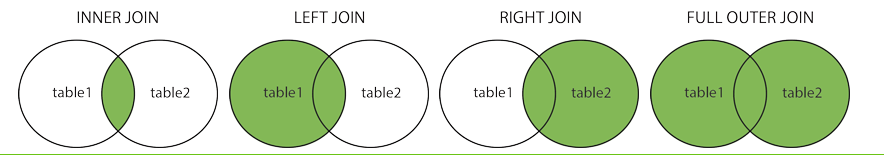
    

Looking at the two datasets that we wish to merge:

In [38]:
sp.head(1)

,Timestamp,Series_No,Product_No,class
0,Timestamp: 01/01/15 01:01:01,XK00001402,5859,Failure


In [39]:
ms.head(1)

,Timestamp,Series_No,Product_No,Turning_Cut_Depth,Milling_Gear_Depth,Drilling_Surf_Quality,Drill_Pressure
0,01/01/15 01:01:01,XK00001402,5859,0.615159,0.302045,0.652705,3.532358


we see that there is a `Product_No` value (a product identifier) in each table, and allthough they're not index columns, they're both unique value columns and regarding this column, this is a one-to-one relationship.

In [40]:
ms_merged = pd.merge(ms, sp, left_on="Product_No", right_on="Product_No")

In [41]:
ms_merged.head()

,Timestamp_x,Series_No_x,Product_No,Turning_Cut_Depth,Milling_Gear_Depth,Drilling_Surf_Quality,Drill_Pressure,Timestamp_y,Series_No_y,class
0,01/01/15 01:01:01,XK00001402,5859,0.615159,0.302045,0.652705,3.532358,Timestamp: 01/01/15 01:01:01,XK00001402,Failure
1,01/01/15 01:03:55,XK00001402,6212,0.645414,0.320177,0.207444,4.014133,Timestamp: 01/01/15 01:03:55,XK00001402,Failure
2,01/01/15 01:04:57,XK00001402,7079,0.637861,0.302711,0.909993,4.377263,Timestamp: 01/01/15 01:04:57,XK00001402,Failure
3,01/01/15 01:05:58,XK00001402,61,0.635685,0.301639,0.010166,4.190312,Timestamp: 01/01/15 01:05:58,XK00001402,OK
4,01/01/15 01:06:15,XK00001402,229,0.599048,0.296018,0.007966,4.896710,Timestamp: 01/01/15 01:06:15,XK00001402,OK


In this case, the default inner join is suitable; we are not interested in observations from either table that do not have corresponding entries in the other. 

Here, we used the `merge` function to perform the merge; we could also have used the `merge` *method* for either of the tables:

In [42]:
sp.merge(ms, left_index=True, right_on='Product_No').head()

,Product_No,Timestamp_x,Series_No_x,Product_No_x,class,Timestamp_y,Series_No_y,Product_No_y,Turning_Cut_Depth,Milling_Gear_Depth,Drilling_Surf_Quality,Drill_Pressure
3912,0,Timestamp: 01/01/15 01:01:01,XK00001402,5859,Failure,07/24/16 07:45:08,XK00001402,0,0.637494,0.310224,0.004732,3.493444
6283,1,Timestamp: 01/01/15 01:03:55,XK00001402,6212,Failure,06/20/17 06:18:01,WK00001576,1,0.652844,0.320212,0.004732,1.274442
8629,2,Timestamp: 01/01/15 01:04:57,XK00001402,7079,Failure,06/20/18 00:53:28,WK00001576,2,0.617482,0.288820,0.003994,1.729314
9334,3,Timestamp: 01/01/15 01:05:58,XK00001402,61,OK,10/09/18 11:53:04,XK00001402,3,0.595691,0.290698,0.005260,4.746772
7403,4,Timestamp: 01/01/15 01:06:15,XK00001402,229,OK,12/07/17 14:30:05,WK00001576,4,0.603474,0.309191,0.003827,1.961616


Occasionally, there will be fields with the same in both tables that we do not wish to use to join the tables; they may contain different information, despite having the same name. In this case, Pandas will by default append suffixes `_x` and `_y` to the columns to uniquely identify them.

### Exercise 6
Fix the following `merge` in order to return a non-empty `DataFrame`.

In [43]:
sp.merge(ms).head(10)

,Timestamp,Series_No,Product_No,class,Turning_Cut_Depth,Milling_Gear_Depth,Drilling_Surf_Quality,Drill_Pressure


## Concatenation

A common data manipulation is appending rows or columns to a dataset that already conform to the dimensions of the exsiting rows or colums, respectively:

In [44]:
np.concatenate([np.random.random(5), np.random.random(5)])

array([0.94127384, 0.46158642, 0.81647964, 0.38405851, 0.99268492,
       0.50933933, 0.1822832 , 0.62863756, 0.85451027, 0.03787666])

This operation is also called *binding* or *stacking*.

With Pandas' indexed data structures, there are additional considerations as the overlap in index values between two data structures affects how they are concatenate.

Lets create 3 dataframes to illustrate the concatenation process.

In [45]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],                     
                    'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                    index=[8, 9, 10, 11])

frames = [df1, df2, df3]

In [46]:
df1.head()

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [47]:
pd.concat([df1, df2, df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [48]:
df1.index.is_unique

True

Concatenating along `axis=1` will concatenate column-wise, but respecting the indices of the two `DataFrames`.

In [49]:
pd.concat([df1, df2], axis=1).shape

(8, 8)

In [50]:
pd.concat([df1, df2], axis=1)

,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7


## Reshaping DataFrame objects

In the context of a single DataFrame, we are often interested in re-arranging the layout of our data. 

This dataset is from Table 6.9 of [Statistical Methods for the Analysis of Repeated Measurements](http://www.amazon.com/Statistical-Methods-Analysis-Repeated-Measurements/dp/0387953701) by Charles S. Davis, pp. 161-163 (Springer, 2002). These data are from a multicenter, randomized controlled trial of botulinum toxin type B (BotB) in patients with cervical dystonia from nine U.S. sites.

* Randomized to placebo (N=36), 5000 units of BotB (N=36), 10,000 units of BotB (N=37)
* Response variable: total score on Toronto Western Spasmodic Torticollis Rating Scale (TWSTRS), measuring severity, pain, and disability of cervical dystonia (high scores mean more impairment)
* TWSTRS measured at baseline (week 0) and weeks 2, 4, 8, 12, 16 after treatment began

In [51]:
ms.head()

,Timestamp,Series_No,Product_No,Turning_Cut_Depth,Milling_Gear_Depth,Drilling_Surf_Quality,Drill_Pressure
0,01/01/15 01:01:01,XK00001402,5859,0.615159,0.302045,0.652705,3.532358
1,01/01/15 01:03:55,XK00001402,6212,0.645414,0.320177,0.207444,4.014133
2,01/01/15 01:04:57,XK00001402,7079,0.637861,0.302711,0.909993,4.377263
3,01/01/15 01:05:58,XK00001402,61,0.635685,0.301639,0.010166,4.190312
4,01/01/15 01:06:15,XK00001402,229,0.599048,0.296018,0.007966,4.896710


This dataset includes repeated measurements of different products. Its possible to present such information in (at least) two ways: showing each repeated measurement in their own row, or in multiple columns representing multiple measurements.


The `stack` method rotates the data frame so that columns are represented in rows:

In [52]:
stacked = ms.stack()
stacked.head(15)

0  Timestamp                01/01/15 01:01:01
   Series_No                       XK00001402
   Product_No                            5859
   Turning_Cut_Depth                 0.615159
   Milling_Gear_Depth                0.302045
   Drilling_Surf_Quality             0.652705
   Drill_Pressure                     3.53236
1  Timestamp                01/01/15 01:03:55
   Series_No                       XK00001402
   Product_No                            6212
   Turning_Cut_Depth                 0.645414
   Milling_Gear_Depth                0.320177
   Drilling_Surf_Quality             0.207444
   Drill_Pressure                     4.01413
2  Timestamp                01/01/15 01:04:57
dtype: object

To complement this, `unstack` pivots from rows back to columns.

In [53]:
stacked.unstack().head()

,Timestamp,Series_No,Product_No,Turning_Cut_Depth,Milling_Gear_Depth,Drilling_Surf_Quality,Drill_Pressure
0,01/01/15 01:01:01,XK00001402,5859,0.615159,0.302045,0.652705,3.53236
1,01/01/15 01:03:55,XK00001402,6212,0.645414,0.320177,0.207444,4.01413
2,01/01/15 01:04:57,XK00001402,7079,0.637861,0.302711,0.909993,4.37726
3,01/01/15 01:05:58,XK00001402,61,0.635685,0.301639,0.0101656,4.19031
4,01/01/15 01:06:15,XK00001402,229,0.599048,0.296018,0.00796608,4.89671


For this dataset, it makes sense to create a hierarchical index based on the patient and observation:

## Pivoting

The `pivot` method allows a DataFrame to be transformed easily between long and wide formats in the same way as a pivot table is created in a spreadsheet. It takes three arguments: `index`, `columns` and `values`, corresponding to the DataFrame index (the row headers), columns and cell values, respectively.

For example, we may want the `Turning_Cut_Depth` variable (the response variable) in wide format according to the Product_No:

In [56]:
mt = pd.read_excel("Data/mechanical_testing.xls")
mt.head(10)

,Test_No,Product_No,Site,Series_No,Turning_Cut_Depth,Milling_Gear_Depth,Drilling_Surf_Quality,Drill_Pressure
0,1,1,1,YZ00001723,0.637494,0.310224,0.004732,3.493444e+15
1,2,1,1,YZ00001723,0.609082,0.296397,0.004521,3.337748e+15
2,3,1,1,YZ00001723,0.652253,0.317406,0.004841,3.574328e+15
3,4,1,1,YZ00001723,0.684182,0.332944,0.005078,3.749298e+15
4,5,1,1,YZ00001723,0.636033,0.309513,0.004721,3.485438e+15
5,6,1,1,YZ00001723,0.684072,0.332890,0.005078,3.748692e+15
6,1,2,1,YZ00001723,0.632855,0.301637,0.007148,1.158858e+15
7,2,2,1,YZ00001723,0.572760,0.272994,0.006470,1.048813e+15
8,3,2,1,YZ00001723,0.554027,0.264065,0.006258,1.014511e+15
9,4,2,1,YZ00001723,0.519736,0.247721,0.005871,9.517193e+14


In [57]:
turning = mt.pivot(index='Product_No', columns='Test_No', values='Turning_Cut_Depth').head(10)
turning

Test_No,1,2,3,4,5,6
Product_No,,,,,,
1,0.637494,0.609082,0.652253,0.684182,0.636033,0.684072
2,0.632855,0.572760,0.554027,0.519736,0.531624,0.538097
3,0.595691,0.568819,0.572353,0.565129,0.596996,0.610263
4,0.648470,0.585047,0.597650,0.583354,0.533717,0.484703
5,0.532740,0.571890,0.588832,0.603383,0.590256,0.598110
6,0.638477,0.692714,0.735238,0.724158,0.660666,0.632133
7,0.637793,0.669767,0.719562,0.772581,0.787702,0.775964
8,0.714647,0.656053,0.669181,0.777190,0.768775,0.726403
9,0.665860,0.634395,0.724573,0.728811,0.600190,0.625805


In [58]:
mt_wide = (mt[['Product_No']]
                  .drop_duplicates()
                  .merge(turning, right_index=True, left_on='Product_No', how='inner')
                  .head(10))
mt_wide

,Product_No,1,2,3,4,5,6
0,1,0.637494,0.609082,0.652253,0.684182,0.636033,0.684072
6,2,0.632855,0.572760,0.554027,0.519736,0.531624,0.538097
12,3,0.595691,0.568819,0.572353,0.565129,0.596996,0.610263
18,4,0.648470,0.585047,0.597650,0.583354,0.533717,0.484703
24,5,0.532740,0.571890,0.588832,0.603383,0.590256,0.598110
30,6,0.638477,0.692714,0.735238,0.724158,0.660666,0.632133
36,7,0.637793,0.669767,0.719562,0.772581,0.787702,0.775964
42,8,0.714647,0.656053,0.669181,0.777190,0.768775,0.726403
48,9,0.665860,0.634395,0.724573,0.728811,0.600190,0.625805
54,10,0.682531,0.738027,0.744495,0.731462,0.685847,0.732039


To convert our "wide" format back to long, we can use the `melt` function, appropriately parameterized. This function is useful for `DataFrame`s where one
or more columns are identifier variables (`id_vars`), with the remaining columns being measured variables (`value_vars`). The measured variables are "unpivoted" to
the row axis, leaving just two non-identifier columns, a *variable* and its corresponding *value*, which can both be renamed using optional arguments.

In [59]:
pd.melt(mt_wide, id_vars=['Product_No'], var_name='Test_No', value_name='Turning_Cut_Depth').head(20)

,Product_No,Test_No,Turning_Cut_Depth
0,1,1,0.637494
1,2,1,0.632855
2,3,1,0.595691
3,4,1,0.648470
4,5,1,0.532740
5,6,1,0.638477
6,7,1,0.637793
7,8,1,0.714647
8,9,1,0.665860
9,10,1,0.682531


This illustrates the two formats for longitudinal data: **long** and **wide** formats. Its typically better to store data in long format because additional data can be included as additional rows in the database, while wide format requires that the entire database schema be altered by adding columns to every row as data are collected.

The preferable format for analysis depends entirely on what is planned for the data, so it is imporant to be able to move easily between them.

A related method, `pivot_table`, creates a spreadsheet-like table with a hierarchical index, and allows the values of the table to be populated using an arbitrary aggregation function.

In [60]:
mt.pivot_table(index=['Site', 'Series_No', 'Product_No'], columns='Test_No', values='Milling_Gear_Depth', aggfunc=max).head(20)

Test_No                            1         2         3         4         5  \
Site Series_No  Product_No                                                     
1    WK00001576 3           0.290698  0.277584  0.279309  0.275783  0.291335   
                8           0.291638  0.267726  0.273084  0.317161  0.313727   
     YZ00001723 1           0.310224  0.296397  0.317406  0.332944  0.309513   
                2           0.301637  0.272994  0.264065  0.247721  0.253387   
2    XK00001402 4           0.332244  0.299749  0.306207  0.298882  0.273450   
                5           0.276784  0.297124  0.305926  0.313486  0.306666   
                9           0.306854  0.292354  0.333912  0.335865  0.276591   
3    YZ00001723 6           0.313152  0.339753  0.360610  0.355175  0.324034   
                7           0.312542  0.328211  0.352612  0.378593  0.386003   
4    YZ00001723 10          0.307229  0.332210  0.335121  0.329255  0.308722   

Test_No                            6  
Site Series_No  Product_No            
1    WK00001576 3           0.297809  
                8           0.296435  
     YZ00001723 1           0.332890  
                2           0.256473  
2    XK00001402 4           0.248338  
                5           0.310747  
                9           0.288395  
3    YZ00001723 6           0.310040  
                7           0.380251  
4    YZ00001723 10          0.329514

For a simple cross-tabulation of group frequencies, the `crosstab` function (not a method) aggregates counts of data according to factors in rows and columns. The factors may be hierarchical if desired.

In [61]:
pd.crosstab(mt.Test_No, mt.Site)

Site,1,2,3,4
Test_No,,,,
1,4,3,2,1
2,4,3,2,1
3,4,3,2,1
4,4,3,2,1
5,4,3,2,1
6,4,3,2,1


## Data transformation

There are a slew of additional operations for DataFrames that we would collectively refer to as "transformations" which include tasks such as removing duplicate values, replacing values, and grouping values.

### Dealing with duplicates

We can easily identify and remove duplicate values from `DataFrame` objects. For example, say we want to remove tests from our `mt` dataset that have the same Product_No:

In [62]:
mt.duplicated(subset='Product_No').head(30)

0     False
1      True
2      True
3      True
4      True
5      True
6     False
7      True
8      True
9      True
10     True
11     True
12    False
13     True
14     True
15     True
16     True
17     True
18    False
19     True
20     True
21     True
22     True
23     True
24    False
25     True
26     True
27     True
28     True
29     True
dtype: bool

In [63]:
mt.drop_duplicates(['Product_No']).head()

,Test_No,Product_No,Site,Series_No,Turning_Cut_Depth,Milling_Gear_Depth,Drilling_Surf_Quality,Drill_Pressure
0,1,1,1,YZ00001723,0.637494,0.310224,0.004732,3.493444e+15
6,1,2,1,YZ00001723,0.632855,0.301637,0.007148,1.158858e+15
12,1,3,1,WK00001576,0.595691,0.290698,0.005260,4.746772e+14
18,1,4,2,XK00001402,0.648470,0.332244,0.004113,2.107877e+16
24,1,5,2,XK00001402,0.532740,0.276784,0.004613,1.027504e+16


### Value replacement

Frequently, we get data columns that are encoded as strings that we wish to represent numerically for the purposes of including it in a quantitative analysis. For example, consider the Series_No variable in the mechanical testing dataset:

In [64]:
mt.Series_No.value_counts()

YZ00001723    30
XK00001402    18
WK00001576    12
Name: Series_No, dtype: int64

A logical way to specify these numerically is to change them to integer values, perhaps using "YZ00001723" as a baseline value. If we create a dict with the original values as keys and the replacements as values, we can pass it to the `map` method to implement the changes.

In [65]:
mt['series'] = mt.Series_No.map({'YZ00001723': 0, 'XK00001402': 1, 'WK00001576': 2})
mt.series.head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    2
13    2
14    2
15    2
16    2
17    2
18    1
19    1
Name: series, dtype: int64

We can also perform the same replacement that we used `map` for with `replace`:

In [66]:
mt.series.replace({0:'YZ00001723', 1:'XK00001402', 2:'WK00001576'}).head(20)

0     YZ00001723
1     YZ00001723
2     YZ00001723
3     YZ00001723
4     YZ00001723
5     YZ00001723
6     YZ00001723
7     YZ00001723
8     YZ00001723
9     YZ00001723
10    YZ00001723
11    YZ00001723
12    WK00001576
13    WK00001576
14    WK00001576
15    WK00001576
16    WK00001576
17    WK00001576
18    XK00001402
19    XK00001402
Name: series, dtype: object

## Categorical Data

Pandas provides a convenient `dtype` for representing categorical (factor) data, called `category`. 

For example, the `Series_No` column in the mechanical testing dataset represents three series numbers of the different products, and is imported by default as an `object` type, since it is a mixture of string characters.

In [67]:
mt.Series_No.head()

0    YZ00001723
1    YZ00001723
2    YZ00001723
3    YZ00001723
4    YZ00001723
Name: Series_No, dtype: object

We can convert this to a `category` type either by the `Categorical` constructor, or casting the column using `astype`:

In [68]:
pd.Categorical(mt.Series_No)

[YZ00001723, YZ00001723, YZ00001723, YZ00001723, YZ00001723, ..., YZ00001723, YZ00001723, YZ00001723, YZ00001723, YZ00001723]
Length: 60
Categories (3, object): [WK00001576, XK00001402, YZ00001723]

In [69]:
mt['Series_No'] = mt.Series_No.astype('category')

In [70]:
mt.Series_No.describe()

count             60
unique             3
top       YZ00001723
freq              30
Name: Series_No, dtype: object

The important difference between the `category` type and the `object` type is that `category` is represented by an <b>underlying array of integers</b>, which is then mapped to character labels.

In [71]:
mt.Series_No.cat.codes.head(20)

0     2
1     2
2     2
3     2
4     2
5     2
6     2
7     2
8     2
9     2
10    2
11    2
12    0
13    0
14    0
15    0
16    0
17    0
18    1
19    1
dtype: int8

Notice that these are 8-bit integers, which are essentially single bytes of data, making memory usage lower.

There is also a performance benefit. Consider an operation such as calculating the average of the Turning Cut Depth for each series number in the `mechanical testing` table (this is also a preview of pandas' `groupby` operation!):


In [72]:
%time mt.groupby(mt.Series_No).Turning_Cut_Depth.mean().sort_values(ascending=False, inplace=False).head()

Wall time: 13 ms


Series_No
YZ00001723    0.667112
WK00001576    0.651792
XK00001402    0.605432
Name: Turning_Cut_Depth, dtype: float64

In [73]:
mt['Series_No'] = mt.Series_No.astype('category')

In [74]:
%time mt.groupby(mt.Series_No).Turning_Cut_Depth.mean().sort_values(ascending=False, inplace=False).head()

Wall time: 3.99 ms


Series_No
YZ00001723    0.667112
WK00001576    0.651792
XK00001402    0.605432
Name: Turning_Cut_Depth, dtype: float64

Hence, we get a considerable speedup simply by using the appropriate `dtype` for our data.

### Discretization

Pandas' `cut` function can be used to group continuous or countable data in to bins. Discretization is generally a very **bad idea** for statistical analysis, so use this function responsibly!

Lets say we want to bin the ages of the cervical dystonia patients into a smaller number of groups:

In [75]:
mt.Turning_Cut_Depth.describe()

count    60.000000
mean      0.645544
std       0.075059
min       0.484703
25%       0.589900
50%       0.637643
75%       0.715875
max       0.787702
Name: Turning_Cut_Depth, dtype: float64

Let's transform these data into decades, beginnnig with individuals in their 20's and ending with those in their 80's:

In [76]:
pd.cut(mt.Turning_Cut_Depth, [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])[:20]

0     (0.6, 0.7]
1     (0.6, 0.7]
2     (0.6, 0.7]
3     (0.6, 0.7]
4     (0.6, 0.7]
5     (0.6, 0.7]
6     (0.6, 0.7]
7     (0.5, 0.6]
8     (0.5, 0.6]
9     (0.5, 0.6]
10    (0.5, 0.6]
11    (0.5, 0.6]
12    (0.5, 0.6]
13    (0.5, 0.6]
14    (0.5, 0.6]
15    (0.5, 0.6]
16    (0.5, 0.6]
17    (0.6, 0.7]
18    (0.6, 0.7]
19    (0.5, 0.6]
Name: Turning_Cut_Depth, dtype: category
Categories (10, interval[float64]): [(0.0, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.6, 0.7] < (0.7, 0.8] < (0.8, 0.9] < (0.9, 1.0]]

The parentheses indicate an open interval, meaning that the interval includes values up to but *not including* the endpoint, whereas the square bracket is a closed interval, where the endpoint is included in the interval. We can switch the closure to the left side by setting the `right` flag to `False`:

In [77]:
pd.cut(mt.Turning_Cut_Depth, [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], right=False)[:20]

0     [0.6, 0.7)
1     [0.6, 0.7)
2     [0.6, 0.7)
3     [0.6, 0.7)
4     [0.6, 0.7)
5     [0.6, 0.7)
6     [0.6, 0.7)
7     [0.5, 0.6)
8     [0.5, 0.6)
9     [0.5, 0.6)
10    [0.5, 0.6)
11    [0.5, 0.6)
12    [0.5, 0.6)
13    [0.5, 0.6)
14    [0.5, 0.6)
15    [0.5, 0.6)
16    [0.5, 0.6)
17    [0.6, 0.7)
18    [0.6, 0.7)
19    [0.5, 0.6)
Name: Turning_Cut_Depth, dtype: category
Categories (10, interval[float64]): [[0.0, 0.1) < [0.1, 0.2) < [0.2, 0.3) < [0.3, 0.4) ... [0.6, 0.7) < [0.7, 0.8) < [0.8, 0.9) < [0.9, 1.0)]

Since the data are now **ordinal**, rather than numeric, we can give them labels:

In [78]:
pd.cut(mt.Turning_Cut_Depth, [0.3,0.4,0.5,0.6,0.7,0.8], labels=['very low','low','medium','high','very high'])[:20]

0       high
1       high
2       high
3       high
4       high
5       high
6       high
7     medium
8     medium
9     medium
10    medium
11    medium
12    medium
13    medium
14    medium
15    medium
16    medium
17      high
18      high
19    medium
Name: Turning_Cut_Depth, dtype: category
Categories (5, object): [very low < low < medium < high < very high]

A related function `qcut` uses empirical quantiles to divide the data. If, for example, we want the quartiles -- (0-25%], (25-50%], (50-70%], (75-100%] -- we can just specify 4 intervals, which will be equally-spaced by default:

In [79]:
pd.qcut(mt.Turning_Cut_Depth, 4)[:20]

0      (0.59, 0.638]
1      (0.59, 0.638]
2     (0.638, 0.716]
3     (0.638, 0.716]
4      (0.59, 0.638]
5     (0.638, 0.716]
6      (0.59, 0.638]
7      (0.484, 0.59]
8      (0.484, 0.59]
9      (0.484, 0.59]
10     (0.484, 0.59]
11     (0.484, 0.59]
12     (0.59, 0.638]
13     (0.484, 0.59]
14     (0.484, 0.59]
15     (0.484, 0.59]
16     (0.59, 0.638]
17     (0.59, 0.638]
18    (0.638, 0.716]
19     (0.484, 0.59]
Name: Turning_Cut_Depth, dtype: category
Categories (4, interval[float64]): [(0.484, 0.59] < (0.59, 0.638] < (0.638, 0.716] < (0.716, 0.788]]

Alternatively, one can specify custom quantiles to act as cut points:

In [80]:
turning_c_d = pd.qcut(mt.Turning_Cut_Depth, [0, 0.01, 0.05, 0.95, 0.99, 1])
turning_c_d[:20]

0     (0.533, 0.773]
1     (0.533, 0.773]
2     (0.533, 0.773]
3     (0.533, 0.773]
4     (0.533, 0.773]
5     (0.533, 0.773]
6     (0.533, 0.773]
7     (0.533, 0.773]
8     (0.533, 0.773]
9     (0.505, 0.533]
10    (0.505, 0.533]
11    (0.533, 0.773]
12    (0.533, 0.773]
13    (0.533, 0.773]
14    (0.533, 0.773]
15    (0.533, 0.773]
16    (0.533, 0.773]
17    (0.533, 0.773]
18    (0.533, 0.773]
19    (0.533, 0.773]
Name: Turning_Cut_Depth, dtype: category
Categories (5, interval[float64]): [(0.484, 0.505] < (0.505, 0.533] < (0.533, 0.773] < (0.773, 0.781] < (0.781, 0.788]]

### Permutation and sampling

For some data analysis tasks, such as simulation, we need to be able to randomly reorder our data, or draw random values from it. Calling NumPy's `permutation` function with the length of the sequence you want to permute generates an array with a permuted sequence of integers, which can be used to re-order the sequence.

In [81]:
new_order = np.random.permutation(len(mt))
new_order[:30]

array([50, 32, 22, 59, 31, 20, 37, 27,  5, 30, 18, 53, 52, 45, 28, 41, 21,
       55, 51,  7, 47,  1, 26, 58, 12, 23, 25, 16, 35, 46])

Using this sequence as an argument to the `take` method results in a reordered DataFrame:

In [82]:
mt.take(new_order).head()

,Test_No,Product_No,Site,Series_No,Turning_Cut_Depth,Milling_Gear_Depth,Drilling_Surf_Quality,Drill_Pressure,series
50,3,9,2,XK00001402,0.724573,0.333912,0.007393,4.774368e+16,1
32,3,6,3,YZ00001723,0.735238,0.360610,0.006163,2.489376e+16,0
22,5,4,2,XK00001402,0.533717,0.273450,0.003385,1.734868e+16,1
59,6,10,4,YZ00001723,0.732039,0.329514,0.007266,2.810658e+16,0
31,2,6,3,YZ00001723,0.692714,0.339753,0.005806,2.345398e+16,0


Compare this ordering with the original:

In [83]:
mt.head()

,Test_No,Product_No,Site,Series_No,Turning_Cut_Depth,Milling_Gear_Depth,Drilling_Surf_Quality,Drill_Pressure,series
0,1,1,1,YZ00001723,0.637494,0.310224,0.004732,3.493444e+15,0
1,2,1,1,YZ00001723,0.609082,0.296397,0.004521,3.337748e+15,0
2,3,1,1,YZ00001723,0.652253,0.317406,0.004841,3.574328e+15,0
3,4,1,1,YZ00001723,0.684182,0.332944,0.005078,3.749298e+15,0
4,5,1,1,YZ00001723,0.636033,0.309513,0.004721,3.485438e+15,0


For random sampling, `DataFrame` and `Series` objects have a `sample` method that can be used to draw samples, with or without replacement:

In [84]:
mt.sample(n=10)

,Test_No,Product_No,Site,Series_No,Turning_Cut_Depth,Milling_Gear_Depth,Drilling_Surf_Quality,Drill_Pressure,series
54,1,10,4,YZ00001723,0.682531,0.307229,0.006774,2.620573e+16,0
40,5,7,3,YZ00001723,0.787702,0.386003,0.007271,3.306825e+16,0
36,1,7,3,YZ00001723,0.637793,0.312542,0.005887,2.677496e+16,0
41,6,7,3,YZ00001723,0.775964,0.380251,0.007163,3.257550e+16,0
26,3,5,2,XK00001402,0.588832,0.305926,0.005099,1.135688e+16,1
39,4,7,3,YZ00001723,0.772581,0.378593,0.007131,3.243347e+16,0
44,3,8,1,WK00001576,0.669181,0.273084,0.006267,3.605598e+15,2
57,4,10,4,YZ00001723,0.731462,0.329255,0.007260,2.808444e+16,0
24,1,5,2,XK00001402,0.532740,0.276784,0.004613,1.027504e+16,1
23,6,4,2,XK00001402,0.484703,0.248338,0.003074,1.575547e+16,1


In [85]:
mt.sample(n=10, replace=True)

,Test_No,Product_No,Site,Series_No,Turning_Cut_Depth,Milling_Gear_Depth,Drilling_Surf_Quality,Drill_Pressure,series
20,3,4,2,XK00001402,0.597650,0.306207,0.003791,1.942685e+16,1
49,2,9,2,XK00001402,0.634395,0.292354,0.006473,4.180167e+16,1
37,2,7,3,YZ00001723,0.669767,0.328211,0.006182,2.811726e+16,0
55,2,10,4,YZ00001723,0.738027,0.332210,0.007325,2.833651e+16,0
41,6,7,3,YZ00001723,0.775964,0.380251,0.007163,3.257550e+16,0
23,6,4,2,XK00001402,0.484703,0.248338,0.003074,1.575547e+16,1
32,3,6,3,YZ00001723,0.735238,0.360610,0.006163,2.489376e+16,0
47,6,8,1,WK00001576,0.726403,0.296435,0.006803,3.913916e+15,2
40,5,7,3,YZ00001723,0.787702,0.386003,0.007271,3.306825e+16,0
15,4,3,1,WK00001576,0.565129,0.275783,0.004990,4.503235e+14,2


## Data aggregation and GroupBy operations

One of the most powerful features of Pandas is its **GroupBy** functionality. On some occasions we may want to perform operations on *groups* of observations within a dataset. For example:

* **aggregation**, such as computing the sum of mean of each group, which involves applying a function to each group and returning the aggregated results
* **slicing** the DataFrame into groups and then doing something with the resulting slices (*e.g.* plotting)
* group-wise **transformation**, such as standardization/normalization

In [86]:
mt_grouped = mt.groupby(mt.Product_No)

However, the grouping is only an intermediate step; for example, we may want to **iterate** over each of the patient groups:

In [87]:
for Product_No, group in mt_grouped:
    print('Product_No', Product_No)
    print('group', group)

Product_No 1
group    Test_No  Product_No  Site   Series_No  Turning_Cut_Depth  \
0        1           1     1  YZ00001723           0.637494   
1        2           1     1  YZ00001723           0.609082   
2        3           1     1  YZ00001723           0.652253   
3        4           1     1  YZ00001723           0.684182   
4        5           1     1  YZ00001723           0.636033   
5        6           1     1  YZ00001723           0.684072   

   Milling_Gear_Depth  Drilling_Surf_Quality  Drill_Pressure  series  
0            0.310224               0.004732    3.493444e+15       0  
1            0.296397               0.004521    3.337748e+15       0  
2            0.317406               0.004841    3.574328e+15       0  
3            0.332944               0.005078    3.749298e+15       0  
4            0.309513               0.004721    3.485438e+15       0  
5            0.332890               0.005078    3.748692e+15       0  
Product_No 2
group     Test_No  Product_No

A common data analysis procedure is the **split-apply-combine** operation, which groups subsets of data together, applies a function to each of the groups, then recombines them into a new data table.

For example, we may want to aggregate our data with with some function.

![split-apply-combine](http://f.cl.ly/items/0s0Z252j0X0c3k3P1M47/Screen%20Shot%202013-06-02%20at%203.04.04%20PM.png)

<div align="right">*(figure taken from "Python for Data Analysis", p.251)*</div>

We can aggregate in Pandas using the `aggregate` (or `agg`, for short) method:

In [88]:
mt_grouped['Turning_Cut_Depth', 'Milling_Gear_Depth', 'Drilling_Surf_Quality', 'Drill_Pressure' ].mean().head(10)

C:\Users\co023080\.conda\envs\dn_platform\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Turning_Cut_Depth,Milling_Gear_Depth,Drilling_Surf_Quality,Drill_Pressure
Product_No,,,,
1,0.650519,0.316562,0.004829,3.564825e+15
2,0.558183,0.266046,0.006305,1.022122e+15
3,0.584875,0.285420,0.005165,4.660585e+14
4,0.572157,0.293145,0.003629,1.859818e+16
5,0.580869,0.301789,0.005030,1.120329e+16
6,0.680565,0.333794,0.005705,2.304261e+16
7,0.727228,0.356369,0.006713,3.052952e+16
8,0.718708,0.293295,0.006730,3.872454e+15
9,0.663272,0.305662,0.006767,4.370444e+16


Notice that the `site` and `Series_No` variables are <b>not included in the aggregation</b>. Since it does not make sense to aggregate string variables, these columns are simply ignored by the method.

Some aggregation functions are so common that Pandas has a convenience method for them, such as `mean`:

The `add_prefix` and `add_suffix` methods can be used to give the columns of the resulting table labels that reflect the transformation:

In [90]:
mt_grouped['Turning_Cut_Depth', 'Milling_Gear_Depth', 'Drilling_Surf_Quality', 'Drill_Pressure' ].mean().add_suffix('_mean').head()

C:\Users\co023080\.conda\envs\dn_platform\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Turning_Cut_Depth_mean,Milling_Gear_Depth_mean,Drilling_Surf_Quality_mean,Drill_Pressure_mean
Product_No,,,,
1,0.650519,0.316562,0.004829,3.564825e+15
2,0.558183,0.266046,0.006305,1.022122e+15
3,0.584875,0.285420,0.005165,4.660585e+14
4,0.572157,0.293145,0.003629,1.859818e+16
5,0.580869,0.301789,0.005030,1.120329e+16


In [91]:
# The median of the `twstrs` variable
mt_grouped['Turning_Cut_Depth'].quantile(0.5).head(10)

Product_No
1     0.644873
2     0.546062
3     0.584022
4     0.584200
5     0.589544
6     0.676690
7     0.746071
8     0.720525
9     0.650127
10    0.731751
Name: Turning_Cut_Depth, dtype: float64

If we wish, we can easily aggregate according to multiple keys:

## References

[Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do) Wes McKinney